In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# examples for probability distributions

In [2]:
from scipy.stats import beta, gamma, norm

x = np.linspace(1,2.5, 150.1)

height_women = norm.pdf(x, 1.6, 0.06)
height_men = norm.pdf(x, 1.8, 0.06)
height_joint = height_men + height_women

x_prob = np.linspace(0,1, 100+1)
x_pos = np.linspace(0, 20, 100 +1)
x_all = np.linspace(-5, 5, 200 +1)

prob = beta.pdf(x_prob, 1.3,1.3)
pos = gamma.pdf(x_pos, 6)
all_ = norm.pdf(x_all, 0, 1)

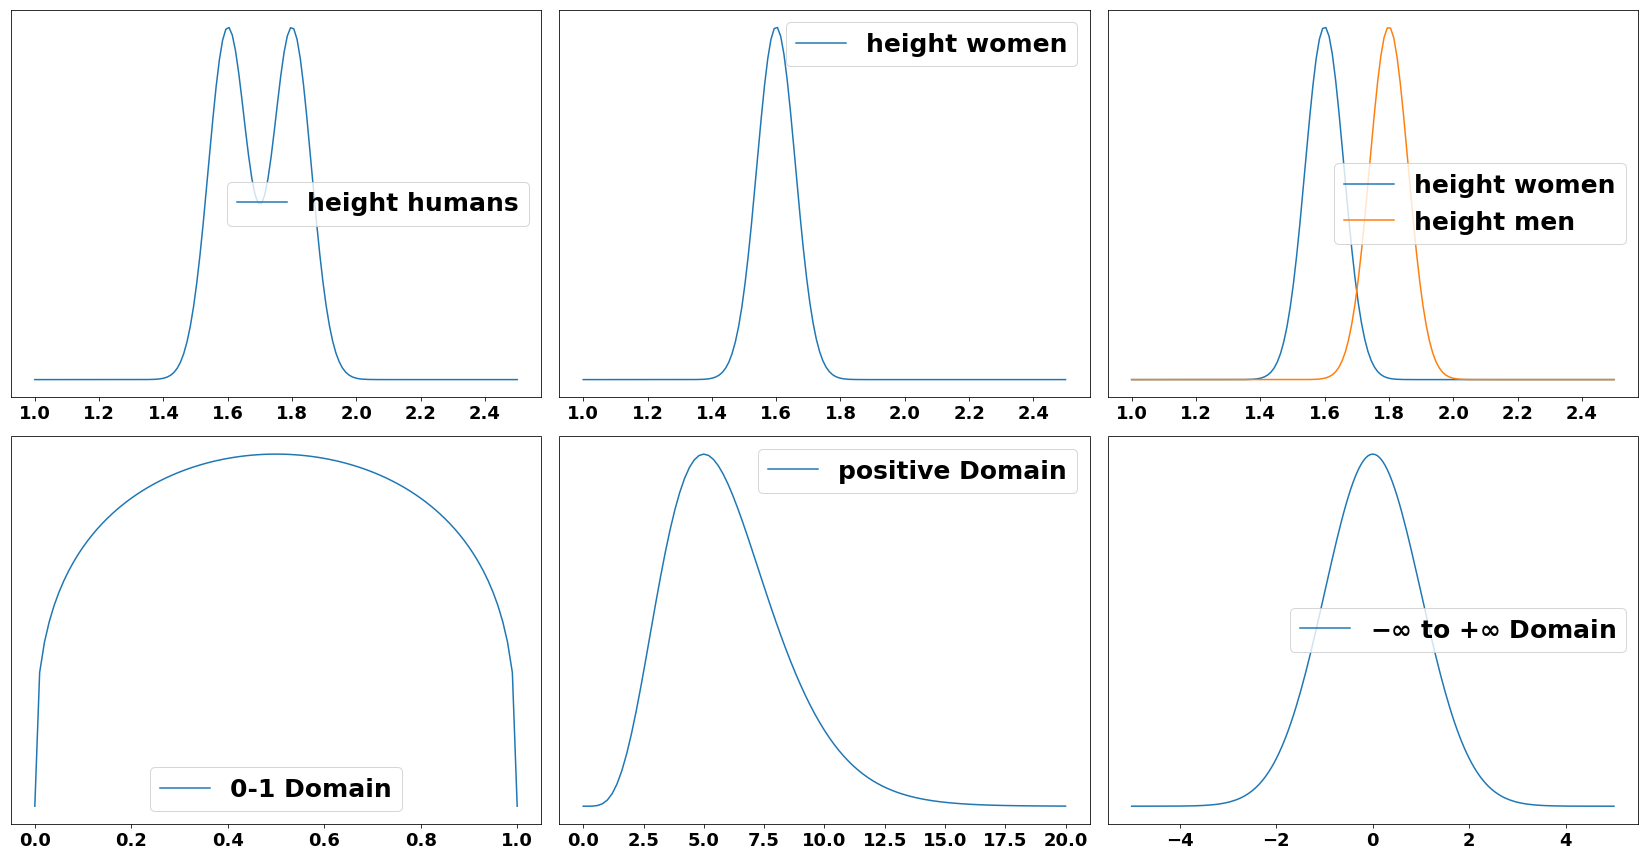

In [3]:
#plot examples
plt.rcParams['xtick.labelsize'] = 18
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, figsize=(23, 12))

axs[0][0].plot(x, height_joint, label='height humans')
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].legend(prop={'size': 25})

axs[0][1].plot(x, height_women, label='height women')
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].legend(prop={'size': 25})

axs[0][2].plot(x, height_women, label='height women')
axs[0][2].plot(x, height_men, label='height men')
axs[0][2].set_yticklabels([])
axs[0][2].set_yticks([])
axs[0][2].legend(prop={'size': 25})

axs[1][0].plot(x_prob, prob, label='0-1 Domain')
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].legend(prop={'size': 25})

axs[1][1].plot(x_pos, pos, label='positive Domain')
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
axs[1][1].legend(prop={'size': 25})

axs[1][2].plot(x_all, all_, label='$-\infty$ to $+\infty$ Domain')
axs[1][2].set_yticklabels([])
axs[1][2].set_yticks([])
axs[1][2].legend(prop={'size': 25})

plt.tight_layout()
plt.savefig('dist_examples.png', dpi=300)

plt.show();

# The general notion

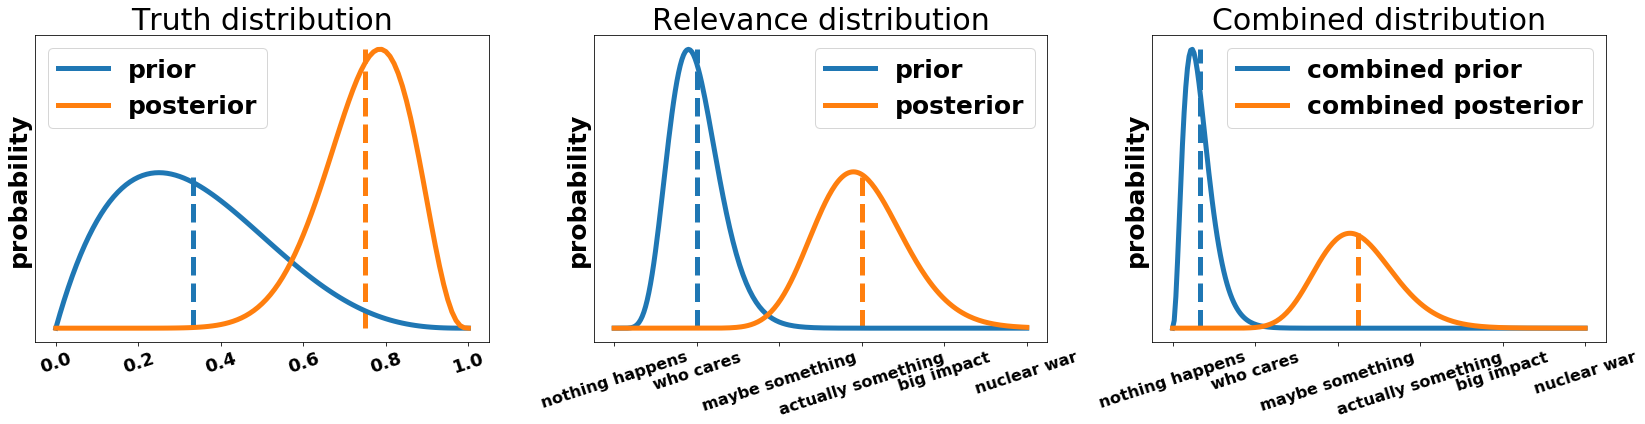

In [42]:
from scipy.stats import beta, gamma

fs_tick_labels = 16
x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]
#truth
x_gn = np.linspace(0,1, 100 +1)
#prior
a_p_gn, b_p_gn = 2, 4
beta_p_gn = beta.pdf(x_gn, a_p_gn, b_p_gn)
beta_p_exp_gn = a_p_gn/(a_p_gn+b_p_gn)

#some update 
a_1_gn, b_1_gn = a_p_gn + 10, b_p_gn
beta_1_gn = beta.pdf(x_gn, a_1_gn, b_1_gn)
beta_1_exp_gn = a_1_gn/(a_1_gn+b_1_gn)

#relevance 

x_gamma_gn = np.linspace(0, 50, 250+1)

#prior
s_gn= 1
g_p_gn = 10
gamma_p_gn = gamma.pdf(x_gamma_gn, g_p_gn, scale=s_gn)

#small impact
g_1_gn = g_p_gn + 20
gamma_1_gn = gamma.pdf(x_gamma_gn, g_1_gn, scale=s_gn)

#combined

def gamma_beta(x, a, b, g, s):
    beta_exp = a/(a+b)
    return(beta_exp, gamma.pdf(x, beta_exp*g, scale=s))
           
gb_exp_p_gn, gamma_beta_p_gn = gamma_beta(x_gamma_gn, a_p_gn, b_p_gn, g_p_gn, s_gn)
gb_exp_1_1_gn, gamma_beta_1_1_gn = gamma_beta(x_gamma_gn, a_1_gn, b_1_gn, g_1_gn, s_gn)

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

axs[0].plot(x_gn, beta_p_gn, label='prior', linewidth=5)
axs[0].plot(x_gn, beta_1_gn, label='posterior', linewidth=5)
axs[0].vlines(beta_p_exp_gn, ymin=0, ymax=1*beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0].vlines(beta_1_exp_gn, ymin=0, ymax=1*beta_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_ylabel('probability', fontdict={'fontsize':25})
axs[0].legend(prop={'size': 25})
axs[0].set_title('Truth distribution', fontdict={'fontsize': 30})

axs[1].plot(x_gamma_gn, gamma_p_gn, label='prior', linewidth=5)
axs[1].plot(x_gamma_gn, gamma_1_gn, label='posterior', linewidth=5)
axs[1].vlines(g_p_gn*s_gn, ymin=0, ymax=1*gamma_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1].vlines(g_1_gn*s_gn, ymin=0, ymax=1*gamma_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].set_ylabel('probability', fontdict={'fontsize':25})
axs[1].legend(prop={'size': 25})
axs[1].set_title('Relevance distribution', fontdict={'fontsize': 30})

axs[2].plot(x_gamma_gn, gamma_beta_p_gn, label='combined prior', linewidth=5)
axs[2].plot(x_gamma_gn, gamma_beta_1_1_gn, label='combined posterior', linewidth=5)
axs[2].vlines(gb_exp_p_gn*s_gn*g_p_gn, ymin=0, ymax=1*gamma_beta_p_gn.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2].vlines(gb_exp_1_1_gn*s_gn*g_1_gn, ymin=0, ymax=1*gamma_beta_1_1_gn.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].legend(prop={'size': 25})
axs[2].set_title('Combined distribution', fontdict={'fontsize': 30})
axs[2].set_ylabel('probability', fontdict={'fontsize':25})



for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18)

plt.tight_layout()
plt.savefig('general_notion.jpeg', dpi=300)

plt.show();

# truth of an argument

In [15]:
#create some distributions
from scipy.stats import beta, gamma

x = np.linspace(0,1, 100 +1)
#prior
a_p, b_p = 1.3, 5
beta_p = beta.pdf(x, a_p, b_p)
beta_p_exp = a_p/(a_p+b_p)

#weak evidence
a_1, b_1 = a_p + 0.2, b_p
beta_1 = beta.pdf(x, a_1, b_1)
beta_1_exp = a_1/(a_1+b_1)

#mediocre evidence
a_2, b_2 = a_p + 0.5, b_p
beta_2 = beta.pdf(x, a_2, b_2)
beta_2_exp = a_2/(a_2+b_2)

#mediocre mechanism
a_3, b_3 = a_p + 3, b_p
beta_3 = beta.pdf(x, a_3, b_3)
beta_3_exp = a_3/(a_3+b_3)

#strong mechanism
a_4, b_4 = a_p + 30, b_p
beta_4 = beta.pdf(x, a_4, b_4)
beta_4_exp = a_4/(a_4+b_4)

#mediocre + stronger mechanism
a_5, b_5 = a_p + 30 + 3, b_p
beta_5 = beta.pdf(x, a_5, b_5)
beta_5_exp = a_5/(a_5+b_5)


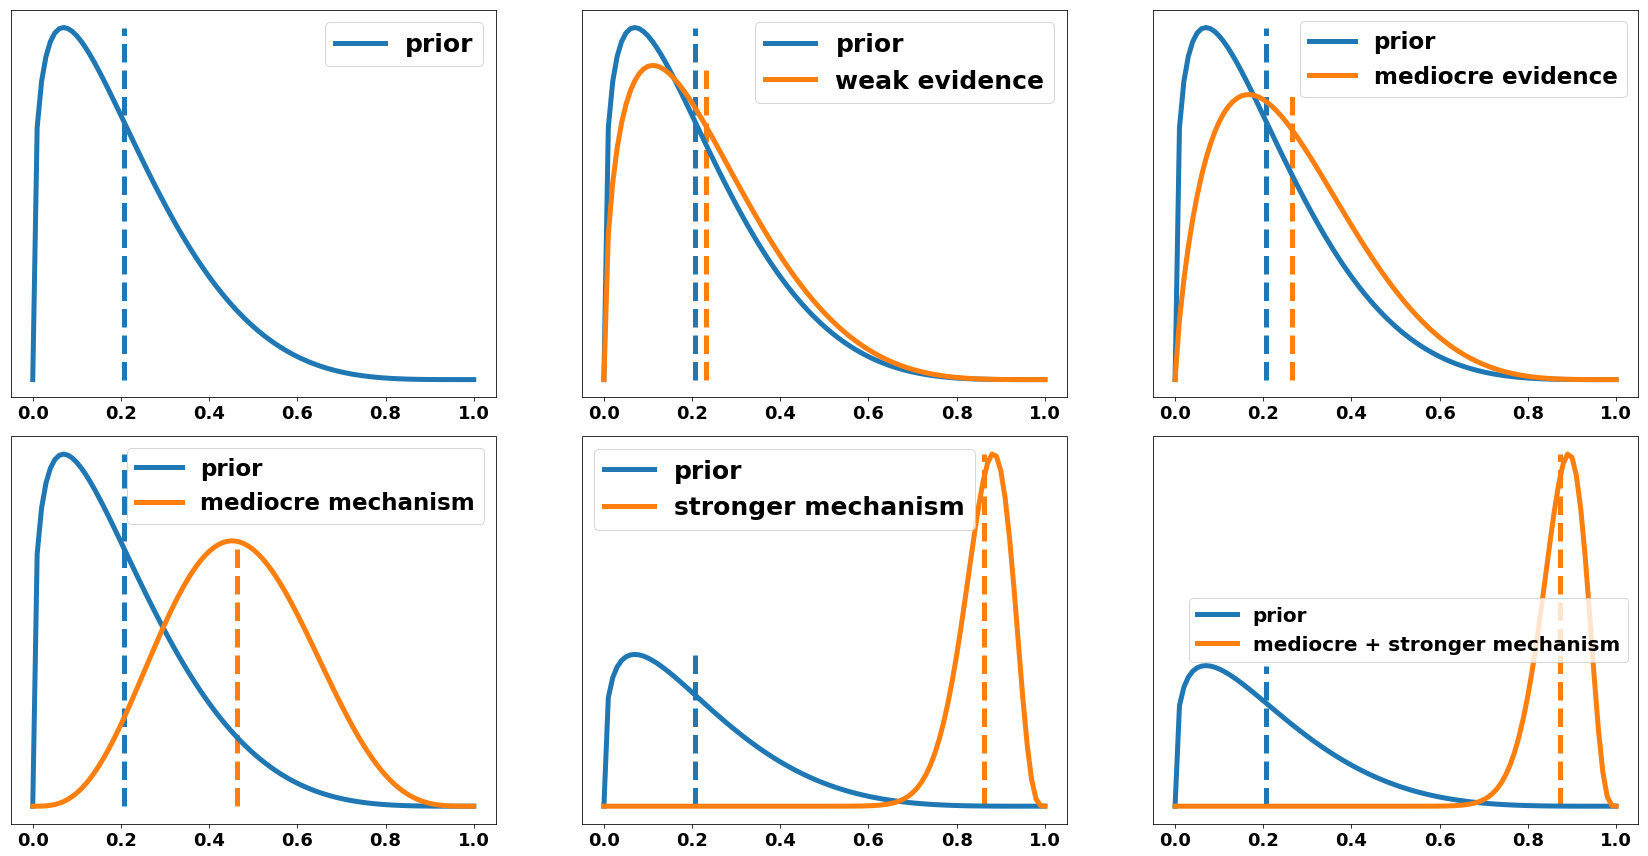

In [18]:
#plot it
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, figsize=(23, 12))

axs[0][0].plot(x, beta_p, label='prior', linewidth=5)
axs[0][0].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].legend(prop={'size': 25})

axs[0][1].plot(x, beta_p, label='prior', linewidth=5)
axs[0][1].plot(x, beta_1, label='weak evidence', linewidth=5)
axs[0][1].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][1].vlines(beta_1_exp, ymin=0, ymax=1*beta_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].legend(prop={'size': 25})

axs[0][2].plot(x, beta_p, label='prior', linewidth=5)
axs[0][2].plot(x, beta_2, label='mediocre evidence', linewidth=5)
axs[0][2].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][2].vlines(beta_2_exp, ymin=0, ymax=1*beta_2.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][2].set_yticklabels([])
axs[0][2].set_yticks([])
axs[0][2].legend(prop={'size': 23})

axs[1][0].plot(x, beta_p, label='prior', linewidth=5)
axs[1][0].plot(x, beta_3, label='mediocre mechanism', linewidth=5)
axs[1][0].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][0].vlines(beta_3_exp, ymin=0, ymax=1*beta_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].legend(prop={'size': 23})

axs[1][1].plot(x, beta_p, label='prior', linewidth=5)
axs[1][1].plot(x, beta_4, label='stronger mechanism', linewidth=5)
axs[1][1].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][1].vlines(beta_4_exp, ymin=0, ymax=1*beta_4.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
axs[1][1].legend(prop={'size': 25})

axs[1][2].plot(x, beta_p, label='prior', linewidth=5)
axs[1][2].plot(x, beta_5, label='mediocre + stronger mechanism', linewidth=5)
axs[1][2].vlines(beta_p_exp, ymin=0, ymax=1*beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][2].vlines(beta_5_exp, ymin=0, ymax=1*beta_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][2].set_yticklabels([])
axs[1][2].set_yticks([])
axs[1][2].legend(prop={'size': 20})

plt.tight_layout()
plt.savefig('UBI_truth.png', dpi=300)

plt.show();

# impact of an argument

In [19]:
# create some impact distributions
from scipy.stats import gamma
x_gamma = np.linspace(0, 100, 250+1)

#prior

s= 1
g_p = 10
gamma_p = gamma.pdf(x_gamma, g_p, scale=s)

#small impact
g_1 = g_p + 4
gamma_1 = gamma.pdf(x_gamma, g_1, scale=s)

#large effect
g_2 = g_p + 20
gamma_2 = gamma.pdf(x_gamma, g_2, scale=s)

#large group
g_3 = g_p + 28
gamma_3 = gamma.pdf(x_gamma, g_3, scale=s)

#strong moral concideration
g_4 = g_p + 12
gamma_4 = gamma.pdf(x_gamma, g_4, scale=s)

#large group + large effect
g_5 = g_2 + g_3 - g_p
gamma_5 = gamma.pdf(x_gamma, g_5, scale=s)


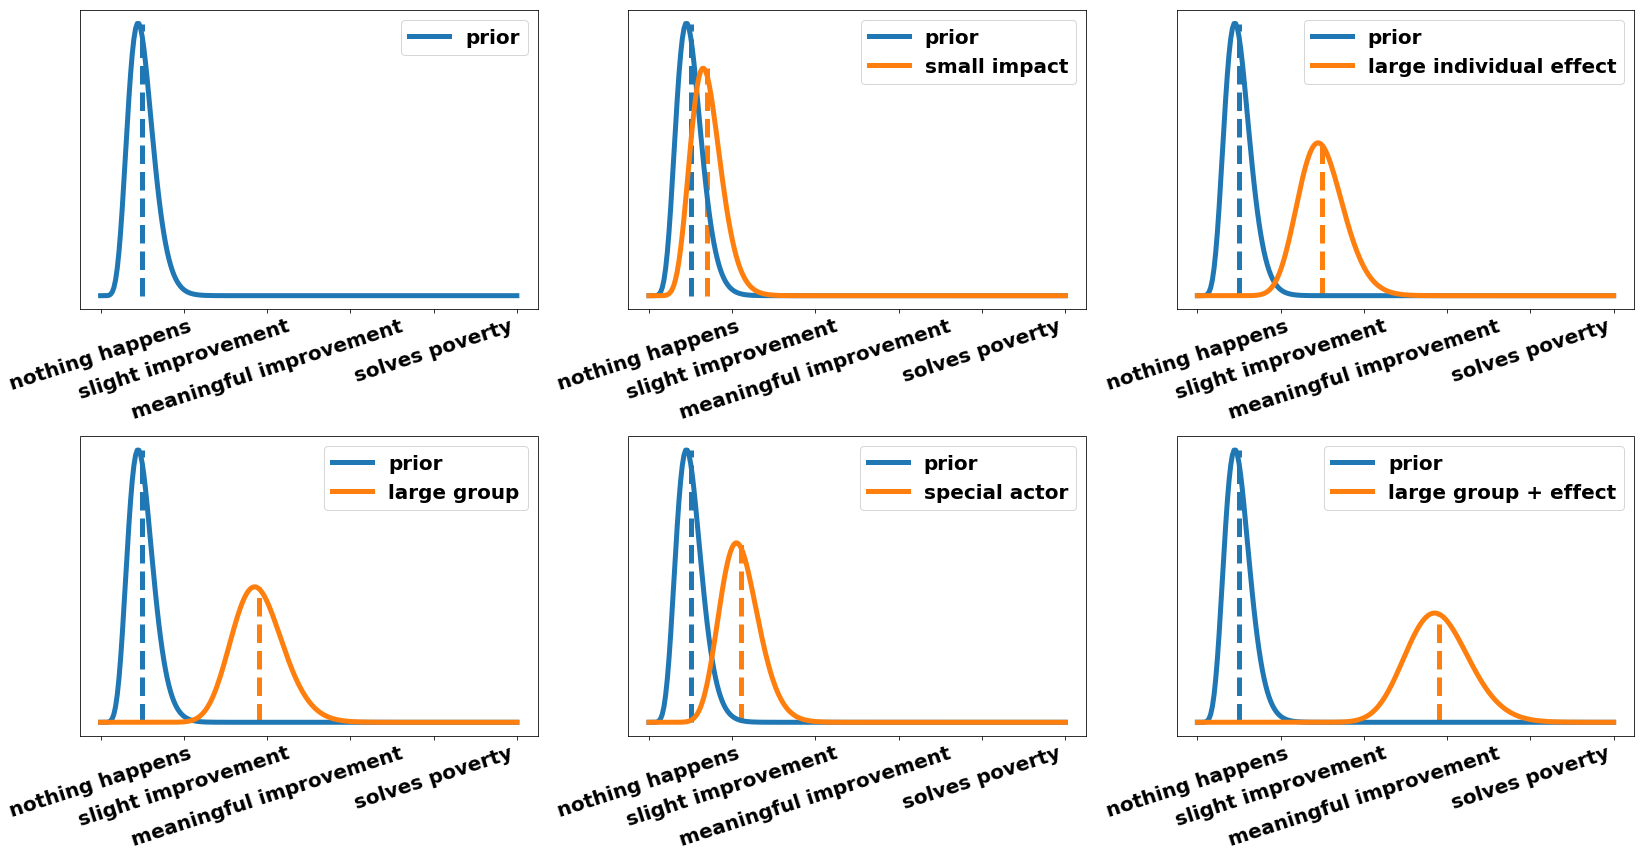

In [22]:
#plot it
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, figsize=(23, 12))
x_labels = ['', 'nothing happens', 'slight improvement', 'meaningful improvement', '', 'solves poverty']

fs_tick_labels = 20

axs[0][0].plot(x_gamma, gamma_p, label='prior', linewidth=5)
axs[0][0].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][0].legend(prop={'size': 20})

axs[0][1].plot(x_gamma, gamma_p, label='prior', linewidth=5)
axs[0][1].plot(x_gamma, gamma_1, label='small impact', linewidth=5)
axs[0][1].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][1].vlines(g_1*s, ymin=0, ymax=1*gamma_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][1].legend(prop={'size': 20})

axs[0][2].plot(x_gamma, gamma_p, label='prior', linewidth=5)
axs[0][2].plot(x_gamma, gamma_2, label='large individual effect', linewidth=5)
axs[0][2].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][2].vlines(g_2*s, ymin=0, ymax=1*gamma_2.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][2].set_yticklabels([])
axs[0][2].set_yticks([])
axs[0][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][2].legend(prop={'size': 20})

axs[1][0].plot(x_gamma, gamma_p, label='prior', linewidth=5)
axs[1][0].plot(x_gamma, gamma_3, label='large group', linewidth=5)
axs[1][0].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][0].vlines(g_3*s, ymin=0, ymax=1*gamma_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][0].legend(prop={'size': 20})

axs[1][1].plot(x_gamma, gamma_p, label='prior', linewidth=5)
axs[1][1].plot(x_gamma, gamma_4, label='special actor', linewidth=5)
axs[1][1].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][1].vlines(g_4*s, ymin=0, ymax=1*gamma_4.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
axs[1][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][1].legend(prop={'size': 20})

axs[1][2].plot(x_gamma, gamma_p, label='prior', linewidth=5)
axs[1][2].plot(x_gamma, gamma_5, label='large group + effect', linewidth=5)
axs[1][2].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][2].vlines(g_5*s, ymin=0, ymax=1*gamma_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][2].set_yticklabels([])
axs[1][2].set_yticks([])
axs[1][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][2].legend(prop={'size': 20})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18)

plt.tight_layout()
plt.savefig('UBI_impact.png', dpi=300)

plt.show();

# combined 

In [23]:
#combine
def gamma_beta(x, a, b, g, s):
    beta_exp = a/(a+b)
    return(beta_exp, gamma.pdf(x, beta_exp*g, scale=s))
           
gb_exp_p, gamma_beta_p = gamma_beta(x_gamma, a_p, b_p, g_p, s)
gb_exp_1_1, gamma_beta_1_1 = gamma_beta(x_gamma, a_1, b_1, g_1, s)
gb_exp_1_3, gamma_beta_1_3 = gamma_beta(x_gamma, a_1, b_1, g_3, s)
gb_exp_1_5, gamma_beta_1_5 = gamma_beta(x_gamma, a_1, b_1, g_5, s)
gb_exp_3_1, gamma_beta_3_1 = gamma_beta(x_gamma, a_3, b_3, g_1, s)
gb_exp_3_3, gamma_beta_3_3 = gamma_beta(x_gamma, a_3, b_3, g_3, s)
gb_exp_3_5, gamma_beta_3_5 = gamma_beta(x_gamma, a_3, b_3, g_5, s)
gb_exp_5_1, gamma_beta_5_1 = gamma_beta(x_gamma, a_5, b_5, g_1, s)
gb_exp_5_3, gamma_beta_5_3 = gamma_beta(x_gamma, a_5, b_5, g_3, s)
gb_exp_5_5, gamma_beta_5_5 = gamma_beta(x_gamma, a_5, b_5, g_5, s)


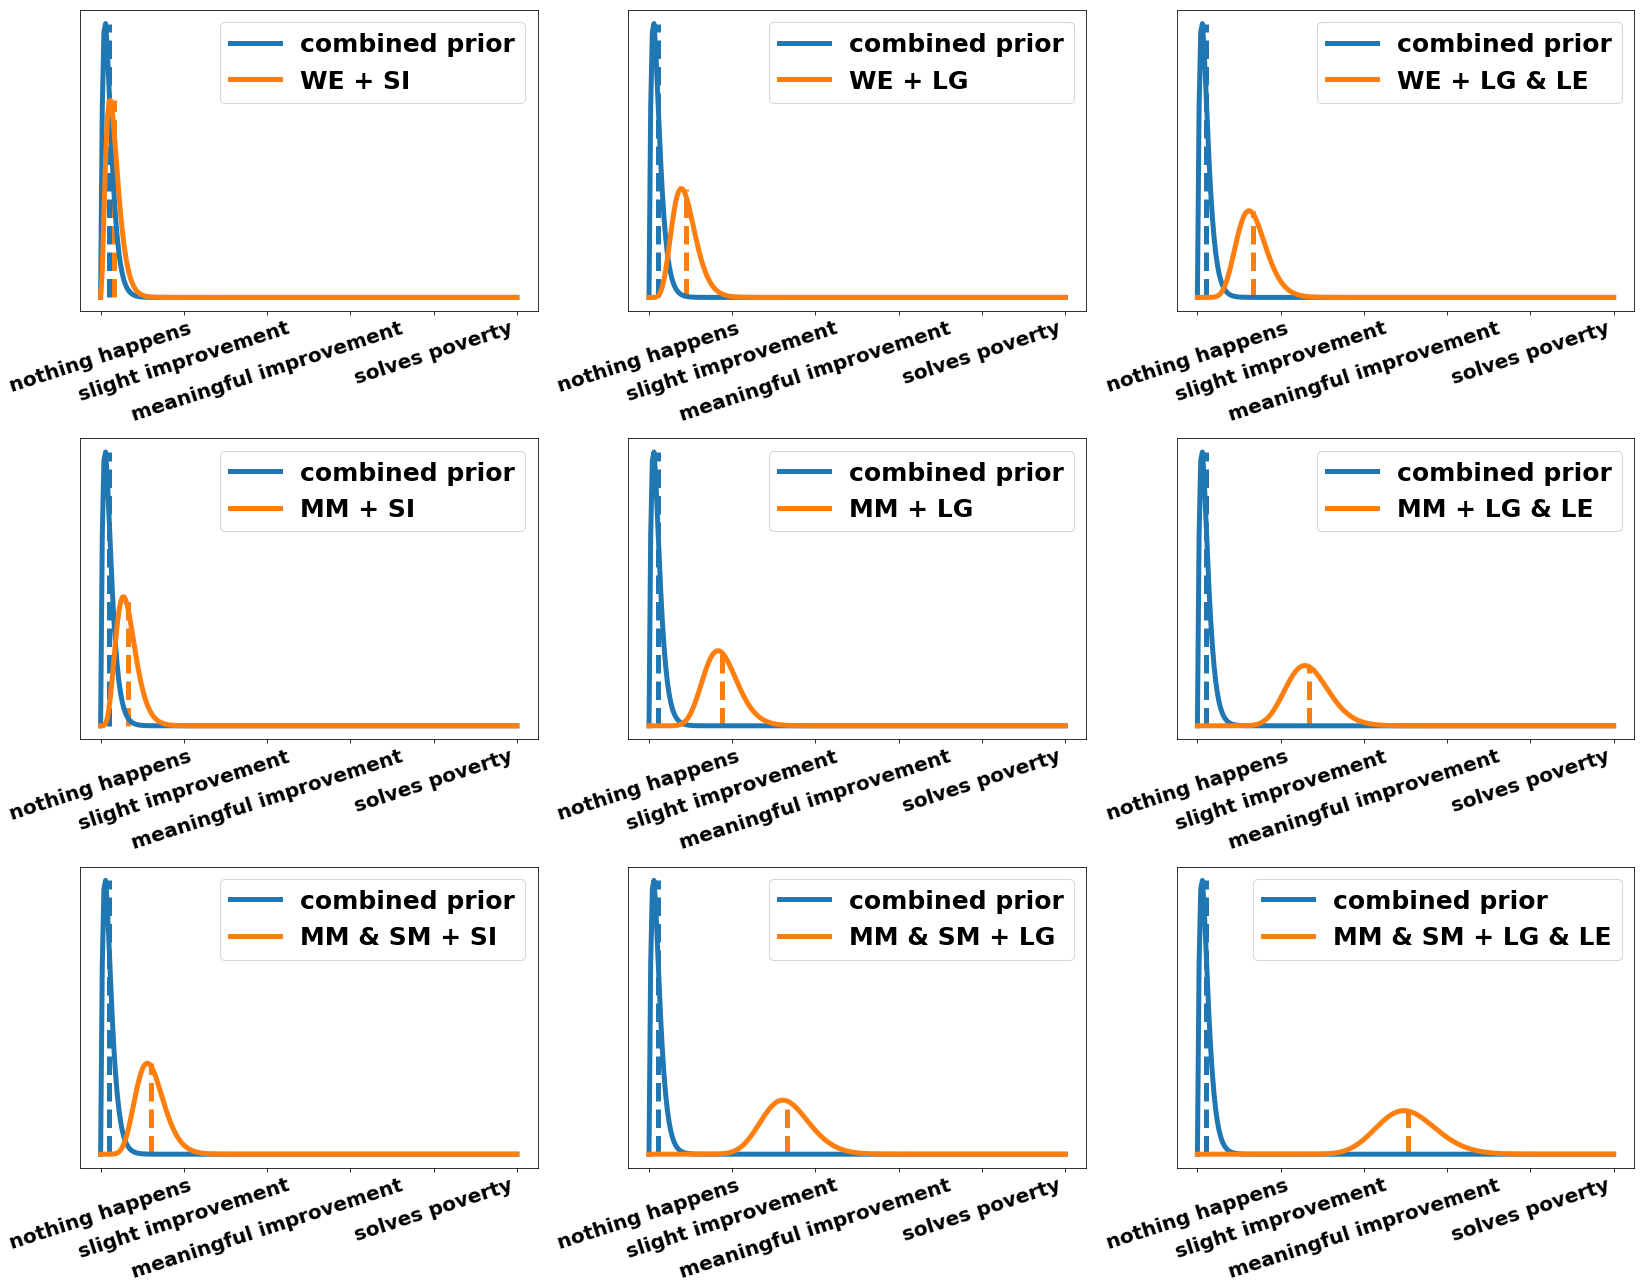

In [25]:
#plot it
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=False, figsize=(23, 18))
x_labels = ['', 'nothing happens', 'slight improvement', 'meaningful improvement', '', 'solves poverty']


fs_tick_labels = 20

axs[0][0].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[0][0].plot(x_gamma, gamma_beta_1_1, label='WE + SI', linewidth=5)
axs[0][0].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][0].vlines(gb_exp_1_1*s*g_1, ymin=0, ymax=1*gamma_beta_1_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][0].legend(prop={'size': 25})

axs[0][1].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[0][1].plot(x_gamma, gamma_beta_1_3, label='WE + LG', linewidth=5)
axs[0][1].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][1].vlines(gb_exp_1_3*s*g_3, ymin=0, ymax=1*gamma_beta_1_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][1].legend(prop={'size': 25})

axs[0][2].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[0][2].plot(x_gamma, gamma_beta_1_5, label='WE + LG & LE', linewidth=5)
axs[0][2].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[0][2].vlines(gb_exp_1_5*s*g_5, ymin=0, ymax=1*gamma_beta_1_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[0][2].set_yticklabels([])
axs[0][2].set_yticks([])
axs[0][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][2].legend(prop={'size': 25})

axs[1][0].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[1][0].plot(x_gamma, gamma_beta_3_1, label='MM + SI', linewidth=5)
axs[1][0].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][0].vlines(gb_exp_3_1*s*g_1, ymin=0, ymax=1*gamma_beta_3_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][0].legend(prop={'size': 25})

axs[1][1].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[1][1].plot(x_gamma, gamma_beta_3_3, label='MM + LG', linewidth=5)
axs[1][1].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][1].vlines(gb_exp_3_3*s*g_3, ymin=0, ymax=1*gamma_beta_3_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
axs[1][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][1].legend(prop={'size': 25})

axs[1][2].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[1][2].plot(x_gamma, gamma_beta_3_5, label='MM + LG & LE', linewidth=5)
axs[1][2].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[1][2].vlines(gb_exp_3_5*s*g_5, ymin=0, ymax=1*gamma_beta_3_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[1][2].set_yticklabels([])
axs[1][2].set_yticks([])
axs[1][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][2].legend(prop={'size': 25})

axs[2][0].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[2][0].plot(x_gamma, gamma_beta_5_1, label='MM & SM + SI', linewidth=5)
axs[2][0].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2][0].vlines(gb_exp_5_1*s*g_1, ymin=0, ymax=1*gamma_beta_5_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2][0].set_yticklabels([])
axs[2][0].set_yticks([])
axs[2][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2][0].legend(prop={'size': 25})

axs[2][1].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[2][1].plot(x_gamma, gamma_beta_5_3, label='MM & SM + LG', linewidth=5)
axs[2][1].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2][1].vlines(gb_exp_5_3*s*g_3, ymin=0, ymax=1*gamma_beta_5_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2][1].set_yticklabels([])
axs[2][1].set_yticks([])
axs[2][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2][1].legend(prop={'size': 25})

axs[2][2].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=5)
axs[2][2].plot(x_gamma, gamma_beta_5_5, label='MM & SM + LG & LE', linewidth=5)
axs[2][2].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=5)
axs[2][2].vlines(gb_exp_5_5*s*g_5, ymin=0, ymax=1*gamma_beta_5_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=5)
axs[2][2].set_yticklabels([])
axs[2][2].set_yticks([])
axs[2][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2][2].legend(prop={'size': 25})


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18)

plt.tight_layout()
plt.savefig('UBI_combined.png', dpi=300)

plt.show();

# combined small

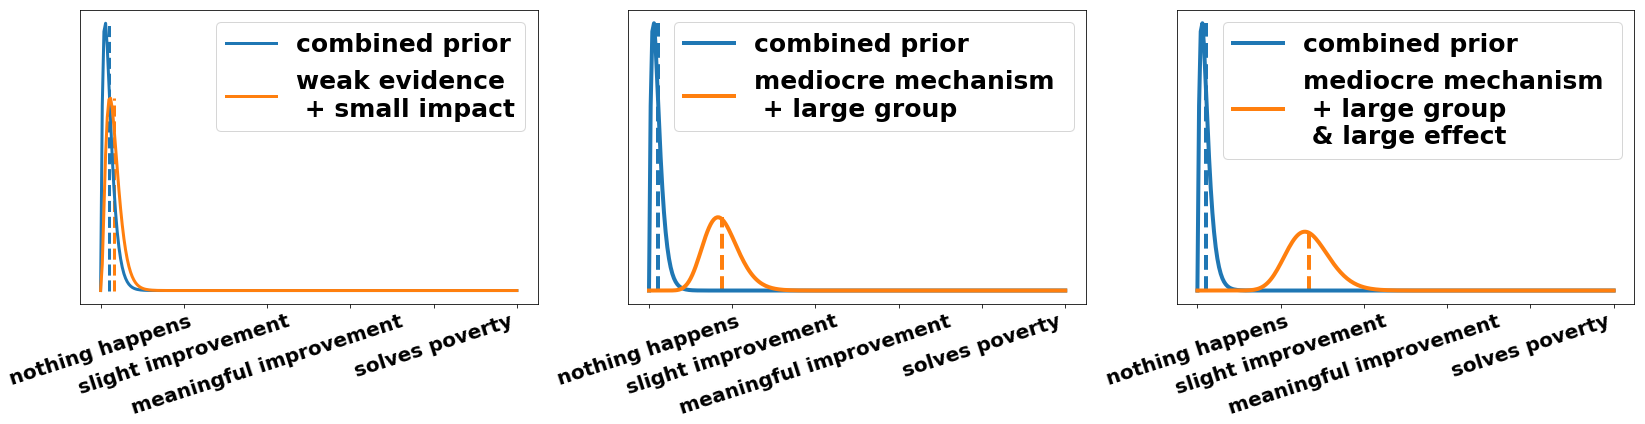

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
x_labels = ['', 'nothing happens', 'slight improvement', 'meaningful improvement', '', 'solves poverty']


fs_tick_labels = 20

axs[0].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=3)
axs[0].plot(x_gamma, gamma_beta_1_1, label='weak evidence \n + small impact', linewidth=3)
axs[0].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=3)
axs[0].vlines(gb_exp_1_1*s*g_1, ymin=0, ymax=1*gamma_beta_1_1.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=3)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0].legend(prop={'size': 25})

axs[1].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=4)
axs[1].plot(x_gamma, gamma_beta_3_3, label='mediocre mechanism \n + large group', linewidth=4)
axs[1].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1].vlines(gb_exp_3_3*s*g_3, ymin=0, ymax=1*gamma_beta_3_3.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].legend(prop={'size': 25})

axs[2].plot(x_gamma, gamma_beta_p, label='combined prior', linewidth=4)
axs[2].plot(x_gamma, gamma_beta_3_5, label='mediocre mechanism \n + large group \n & large effect', linewidth=4)
axs[2].vlines(gb_exp_p*s*g_p, ymin=0, ymax=1*gamma_beta_p.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[2].vlines(gb_exp_3_5*s*g_5, ymin=0, ymax=1*gamma_beta_3_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].legend(prop={'size': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18)

plt.tight_layout()
plt.savefig('UBI_combined_small.png', dpi=300)

plt.show();

# A principle right 

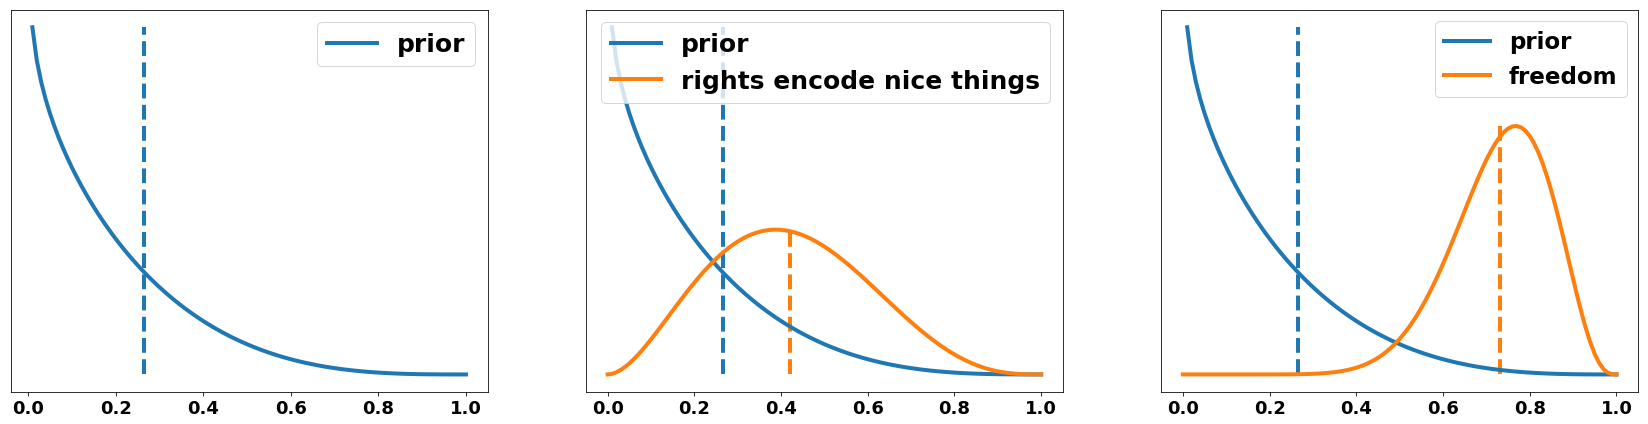

In [30]:
# truth for right
#create some distributions
from scipy.stats import beta, gamma, chi2

x = np.linspace(0,1, 100 +1)
#prior
a_p_r, b_p_r = 0.9, 4
beta_p_r = beta.pdf(x, a_p_r, b_p_r)
beta_p_exp_r = a_p/(a_p_r+b_p_r)

#rights encode nice stuff
a_1_r, b_1_r = a_p_r + 2, b_p_r
beta_1_r = beta.pdf(x, a_1_r, b_1_r)
beta_1_exp_r = a_1_r/(a_1_r+b_1_r)

#freeedoooooooom
a_2_r, b_2_r = a_p_r + 10, b_p_r
beta_2_r = beta.pdf(x, a_2_r, b_2_r)
beta_2_exp_r = a_2_r/(a_2_r+b_2_r)



#plot it
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

axs[0].plot(x, beta_p_r, label='prior', linewidth=4)
axs[0].vlines(beta_p_exp_r, ymin=0, ymax=1*beta_p_r[1], linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].legend(prop={'size': 25})

axs[1].plot(x, beta_p_r, label='prior', linewidth=4)
axs[1].plot(x, beta_1_r, label='rights encode nice things', linewidth=4)
axs[1].vlines(beta_p_exp_r, ymin=0, ymax=1*beta_p_r[1], linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1].vlines(beta_1_exp_r, ymin=0, ymax=1*beta_1_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].legend(prop={'size': 25})

axs[2].plot(x, beta_p_r, label='prior', linewidth=4)
axs[2].plot(x, beta_2_r, label='freedom', linewidth=4)
axs[2].vlines(beta_p_exp_r, ymin=0, ymax=1*beta_p_r[1], linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[2].vlines(beta_2_exp_r, ymin=0, ymax=1*beta_2_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].legend(prop={'size': 23})

plt.tight_layout()
plt.savefig('UBI_truth_right.png', dpi=300)

plt.show();

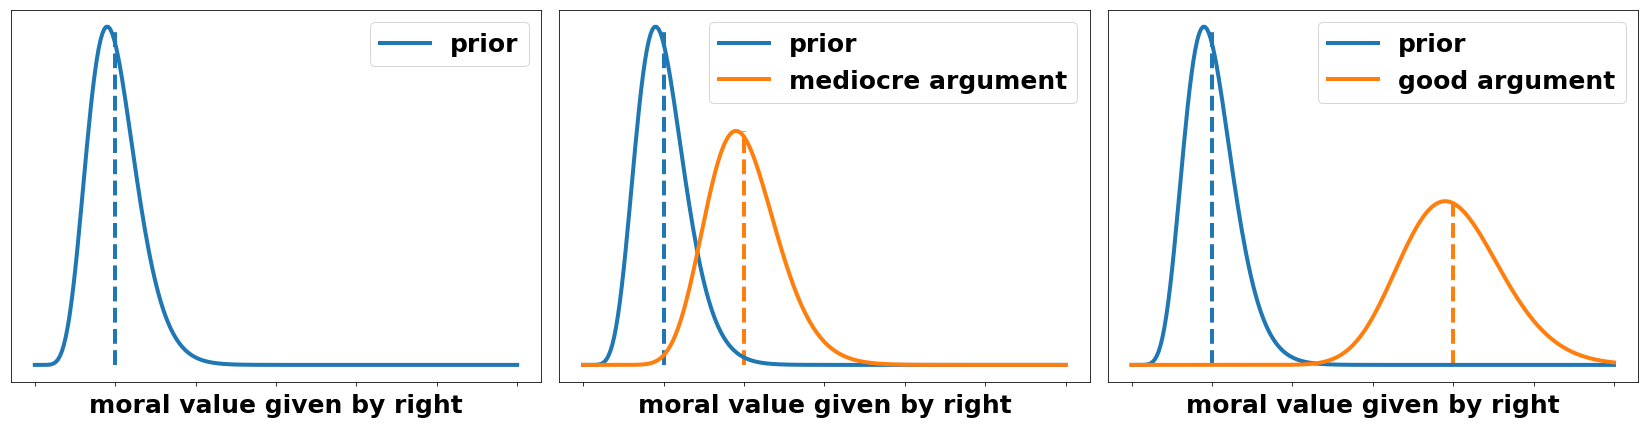

In [31]:
# relevance for right
# create some right distributions
from scipy.stats import gamma
x_gamma_r = np.linspace(0, 60, 250+1)

#prior

s_r = 1
g_p_r = 10
gamma_p_r = gamma.pdf(x_gamma_r, g_p_r, scale=s_r)

#small violation of the right
g_1_r = g_p_r + 10
gamma_1_r = gamma.pdf(x_gamma_r, g_1_r, scale=s_r)

#large effect
g_2_r = g_p_r + 30
gamma_2_r = gamma.pdf(x_gamma_r, g_2_r, scale=s_r)

#plot it
fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))
#x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]

fs_tick_labels = 15

axs[0].plot(x_gamma_r, gamma_p_r, label='prior', linewidth=4)
axs[0].vlines(g_p*s, ymin=0, ymax=1*gamma_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
#axs[0][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0].set_xticklabels([])
axs[0].set_xlabel('moral value given by right', fontsize=25)
axs[0].legend(prop={'size': 25})

axs[1].plot(x_gamma_r, gamma_p_r, label='prior', linewidth=4)
axs[1].plot(x_gamma_r, gamma_1_r, label='mediocre argument', linewidth=4)
axs[1].vlines(g_p_r*s, ymin=0, ymax=1*gamma_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1].vlines(g_1_r*s, ymin=0, ymax=1*gamma_1_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
#axs[0][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1].set_xticklabels([])
axs[1].set_xlabel('moral value given by right', fontsize=25)
axs[1].legend(prop={'size': 25})

axs[2].plot(x_gamma_r, gamma_p_r, label='prior', linewidth=4)
axs[2].plot(x_gamma_r, gamma_2_r, label='good argument', linewidth=4)
axs[2].vlines(g_p_r*s, ymin=0, ymax=1*gamma_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[2].vlines(g_2_r*s, ymin=0, ymax=1*gamma_2_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
#axs[0][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[2].set_xticklabels([])
axs[2].set_xlabel('moral value given by right', fontsize=25)
axs[2].legend(prop={'size': 25})


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18)

plt.tight_layout()
plt.savefig('UBI_rights_violation.png', dpi=300)

plt.show();

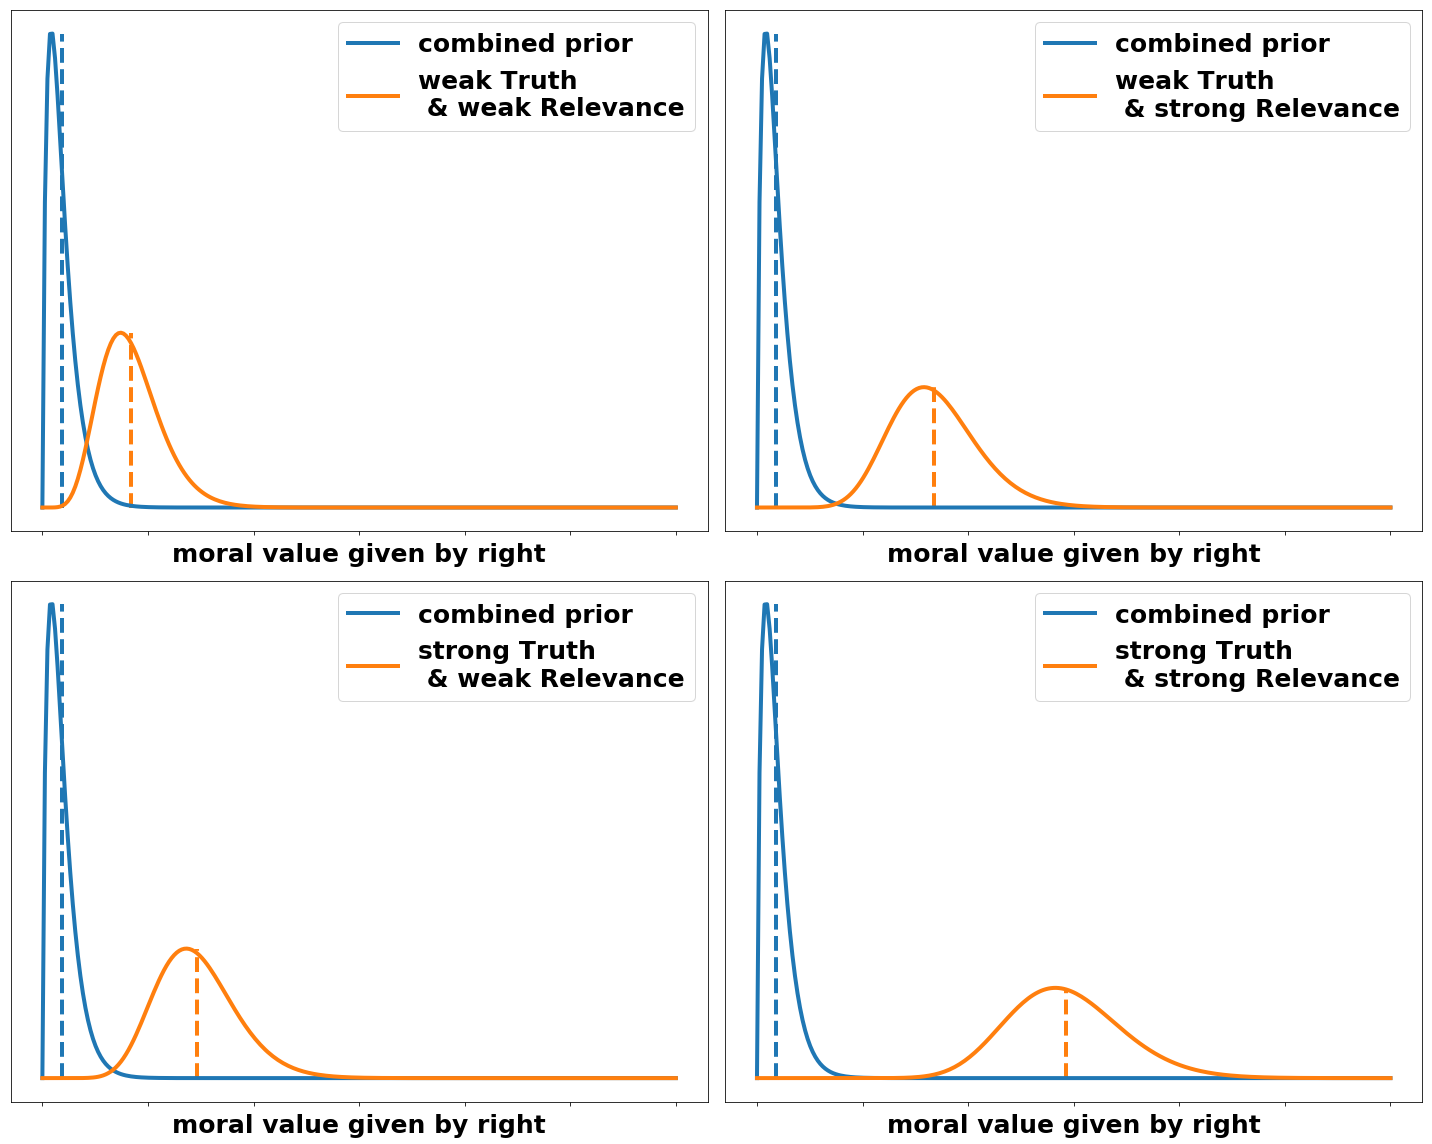

In [32]:
# combined for right

gb_exp_p_r, gamma_beta_p_r = gamma_beta(x_gamma_r, a_p_r, b_p_r, g_p_r, s_r)
gb_exp_1_1_r, gamma_beta_1_1_r = gamma_beta(x_gamma_r, a_1_r, b_1_r, g_1_r, s_r)
gb_exp_1_2_r, gamma_beta_1_2_r = gamma_beta(x_gamma_r, a_1_r, b_1_r, g_2_r, s_r)
gb_exp_2_1_r, gamma_beta_2_1_r = gamma_beta(x_gamma_r, a_2_r, b_2_r, g_1_r, s_r)
gb_exp_2_2_r, gamma_beta_2_2_r = gamma_beta(x_gamma_r, a_2_r, b_2_r, g_2_r, s_r)

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=False, figsize=(20, 16))
#x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]


fs_tick_labels = 15

axs[0][0].plot(x_gamma_r, gamma_beta_p_r, label='combined prior', linewidth=4)
axs[0][0].plot(x_gamma_r, gamma_beta_1_1_r, label='weak Truth \n & weak Relevance', linewidth=4)
axs[0][0].vlines(gb_exp_p_r*s_r*g_p_r, ymin=0, ymax=1*gamma_beta_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0][0].vlines(gb_exp_1_1_r*s_r*g_1_r, ymin=0, ymax=1*gamma_beta_1_1_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
#axs[0][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][0].set_xticklabels([])
axs[0][0].set_xlabel('moral value given by right', fontsize=25)
axs[0][0].legend(prop={'size': 25})

axs[0][1].plot(x_gamma_r, gamma_beta_p_r, label='combined prior', linewidth=4)
axs[0][1].plot(x_gamma_r, gamma_beta_1_2_r, label='weak Truth \n & strong Relevance', linewidth=4)
axs[0][1].vlines(gb_exp_p_r*s_r*g_p_r, ymin=0, ymax=1*gamma_beta_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0][1].vlines(gb_exp_1_2_r*s_r*g_2_r, ymin=0, ymax=1*gamma_beta_1_2_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
#axs[0][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[0][1].set_xticklabels([])
axs[0][1].set_xlabel('moral value given by right', fontsize=25)
axs[0][1].legend(prop={'size': 25})

axs[1][0].plot(x_gamma_r, gamma_beta_p_r, label='combined prior', linewidth=4)
axs[1][0].plot(x_gamma_r, gamma_beta_2_1_r, label='strong Truth \n & weak Relevance', linewidth=4)
axs[1][0].vlines(gb_exp_p_r*s_r*g_p_r, ymin=0, ymax=1*gamma_beta_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1][0].vlines(gb_exp_2_1_r*s_r*g_1_r, ymin=0, ymax=1*gamma_beta_2_1_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
#axs[1][0].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][0].set_xticklabels([])
axs[1][0].set_xlabel('moral value given by right', fontsize=25)
axs[1][0].legend(prop={'size': 25})

axs[1][1].plot(x_gamma_r, gamma_beta_p_r, label='combined prior', linewidth=4)
axs[1][1].plot(x_gamma_r, gamma_beta_2_2_r, label='strong Truth \n & strong Relevance', linewidth=4)
axs[1][1].vlines(gb_exp_p_r*s_r*g_p_r, ymin=0, ymax=1*gamma_beta_p_r.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1][1].vlines(gb_exp_2_2_r*s_r*g_2_r, ymin=0, ymax=1*gamma_beta_2_2_r.max(), linestyle='dashed', alpha=1, color="#ff7f0e", linewidth=4)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
#axs[1][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][1].set_xticklabels([])
axs[1][1].set_xlabel('moral value given by right', fontsize=25)
axs[1][1].legend(prop={'size': 25})


plt.tight_layout()
plt.savefig('UBI_combined_right.png', dpi=300)

plt.show();

# Prior Distributions

In [33]:
x = np.linspace(0,1, 100 +1)

#prior for true
a_p0, b_p0 = 10, 0.1
beta_m0 = a_p0/(a_p0 + b_p0)
beta_p0 = beta.pdf(x, a_p0, b_p0)

#prior for false
a_p1, b_p1 = 0.1, 20
beta_m1 = a_p1/(a_p1 + b_p1)
beta_p1 = beta.pdf(x, a_p1, b_p1)

#prior for very uncertain
a_p2, b_p2 = 1.1, 1.1
beta_m2 = a_p2/(a_p2 + b_p2)
beta_p2 = beta.pdf(x, a_p2, b_p2)

x_gamma = np.linspace(0, 25, 250+1)

#prior for climate change
s= 1
g_p0 = 11
g_m0 = 2 * g_p0
gamma_p0 = gamma.pdf(x_gamma, g_p0, scale=2)

#prior for torchering children
g_p1 = 18
g_m1 = s * g_p1
gamma_p1 = gamma.pdf(x_gamma, g_p1, scale=s)

#negligible prior
g_p2 = 0.5
g_m2 = s * g_p2
gamma_p2 = gamma.pdf(x_gamma, g_p2, scale=s)

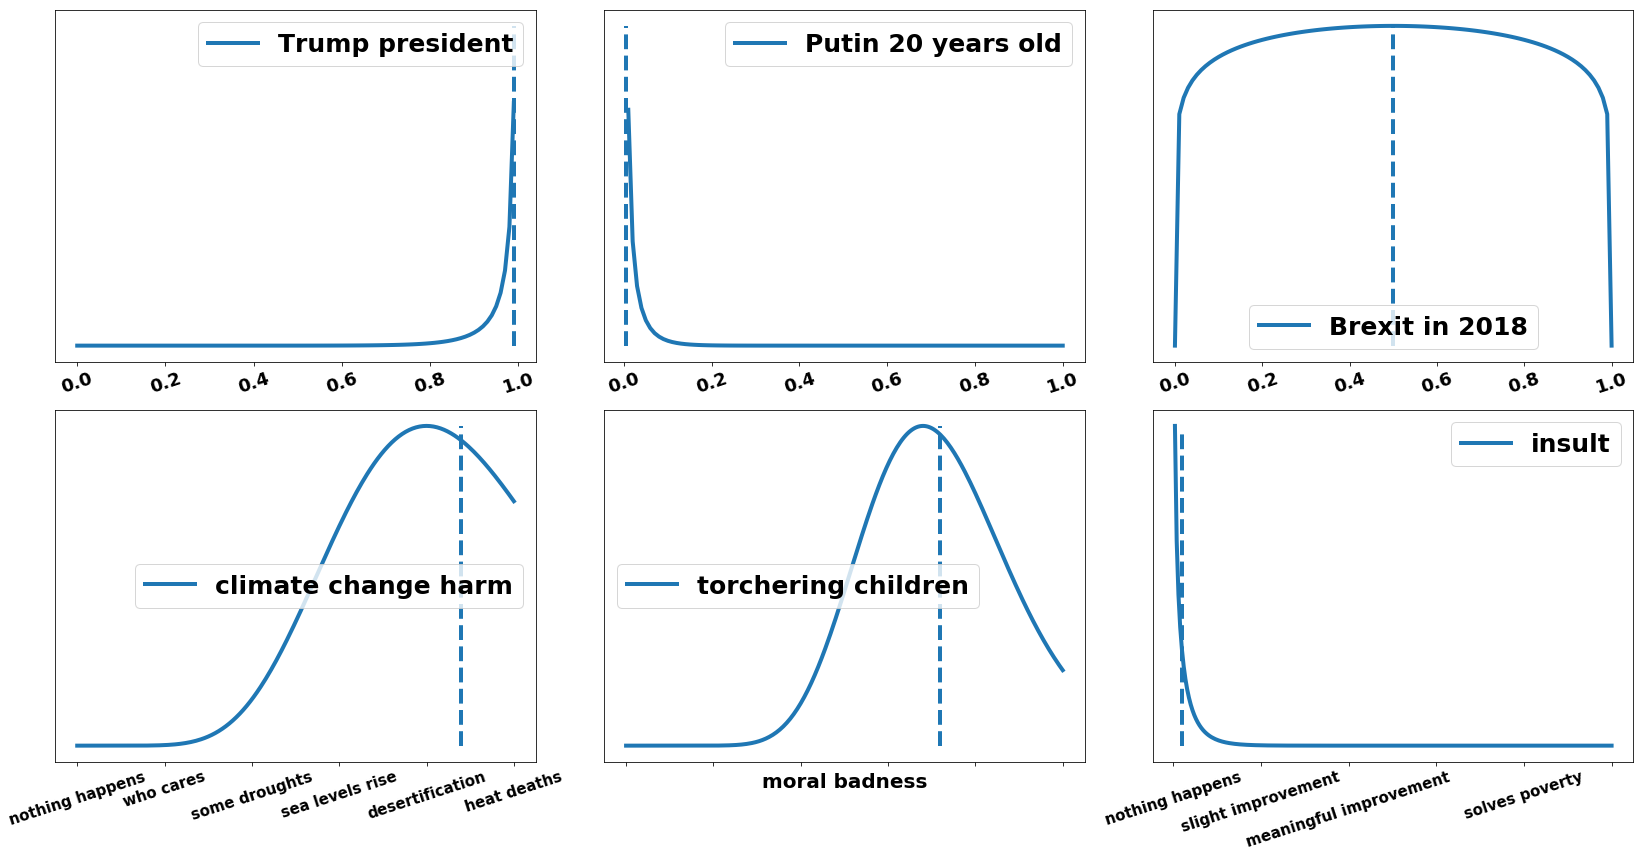

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=False, figsize=(23, 12))
#x_labels = ['', 'nothing happens', 'who cares', 'maybe something', 'actually something', 'big impact', 'nuclear war' ]

axs[0][0].plot(x, beta_p0, label='Trump president', linewidth=4)
axs[0][0].vlines(beta_m0, ymin=0, ymax=1*10, linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0][0].set_yticklabels([])
axs[0][0].set_yticks([])
axs[0][0].legend(prop={'size': 25})

axs[0][1].plot(x, beta_p1, label='Putin 20 years old', linewidth=4)
axs[0][1].vlines(beta_m1, ymin=0, ymax=1*10, linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0][1].set_yticklabels([])
axs[0][1].set_yticks([])
axs[0][1].legend(prop={'size': 25})

axs[0][2].plot(x, beta_p2, label='Brexit in 2018', linewidth=4)
axs[0][2].vlines(beta_m2, ymin=0, ymax=beta_p2.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0][2].set_yticklabels([])
axs[0][2].set_yticks([])
axs[0][2].legend(prop={'size': 25})

axs[1][0].plot(x_gamma, gamma_p0, label='climate change harm', linewidth=4)
axs[1][0].vlines(g_m0*s, ymin=0, ymax=1*gamma_p0.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1][0].set_yticklabels([])
axs[1][0].set_yticks([])
axs[1][0].set_xticklabels(['', 'nothing happens', 'who cares', 'some droughts', 'sea levels rise', 'desertification', 'heat deaths' ], fontdict={'fontsize':fs_tick_labels})
axs[1][0].legend(prop={'size': 25})

axs[1][1].plot(x_gamma, gamma_p1, label='torchering children', linewidth=4)
axs[1][1].vlines(g_m1*s, ymin=0, ymax=1*gamma_p1.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1][1].set_yticklabels([])
axs[1][1].set_yticks([])
#axs[1][1].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][1].set_xticklabels([])
axs[1][1].set_xlabel('moral badness', fontsize=20)
axs[1][1].legend(prop={'size': 25})

axs[1][2].plot(x_gamma, gamma_p2, label='insult', linewidth=4)
axs[1][2].vlines(g_m2*s, ymin=0, ymax=1*1.6, linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1][2].set_yticklabels([])
axs[1][2].set_yticks([])
axs[1][2].set_xticklabels(x_labels, fontdict={'fontsize':fs_tick_labels})
axs[1][2].legend(prop={'size': 25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=18)

plt.tight_layout()
plt.savefig('priors.png', dpi=300)

plt.show();

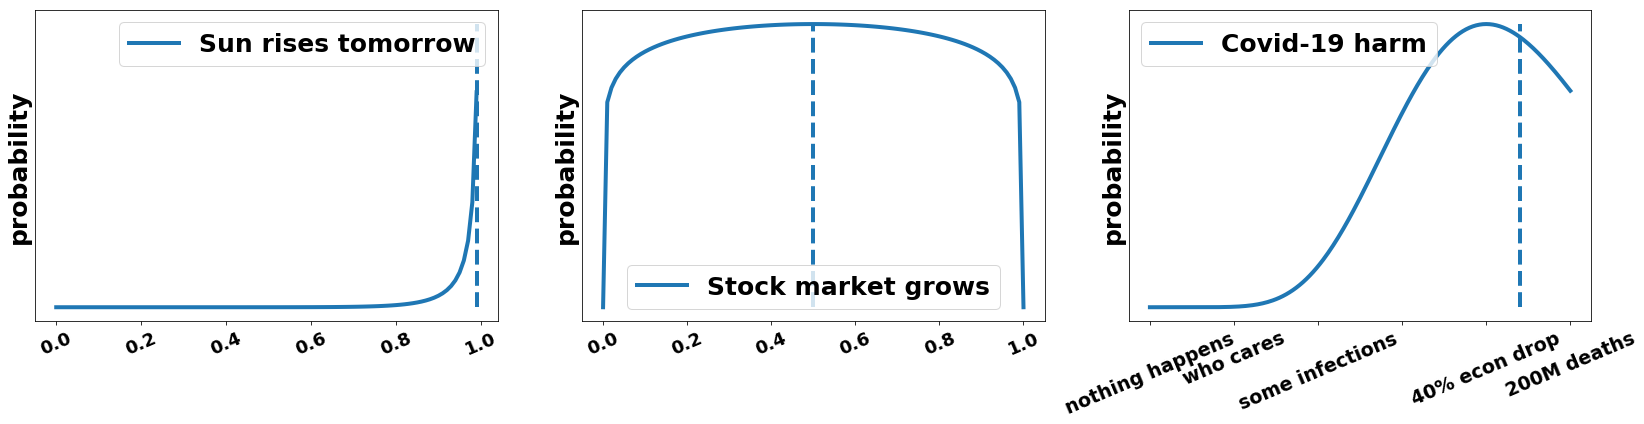

In [38]:
#priors for the overview

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(23, 6))

fs_tick_labels = 19

axs[0].plot(x, beta_p0, label='Sun rises tomorrow', linewidth=4)
axs[0].vlines(beta_m0, ymin=0, ymax=1*10, linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_ylabel('probability', fontdict={'fontsize':25})
axs[0].legend(prop={'size': 25})

axs[1].plot(x, beta_p2, label='Stock market grows', linewidth=4)
axs[1].vlines(beta_m2, ymin=0, ymax=beta_p2.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel('probability', fontdict={'fontsize':25})
axs[1].legend(prop={'size': 25})

axs[2].plot(x_gamma, gamma_p0, label='Covid-19 harm', linewidth=4)
axs[2].vlines(g_m0*s, ymin=0, ymax=1*gamma_p0.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xticklabels(['', 'nothing happens', 'who cares', 'some infections', '', '40% econ drop', '200M deaths' ], fontdict={'fontsize':fs_tick_labels})
axs[2].legend(prop={'size': 25})
axs[2].set_ylabel('probability', fontdict={'fontsize':25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=23)

plt.tight_layout()
plt.savefig('priors_overview.png', dpi=300)

plt.show();

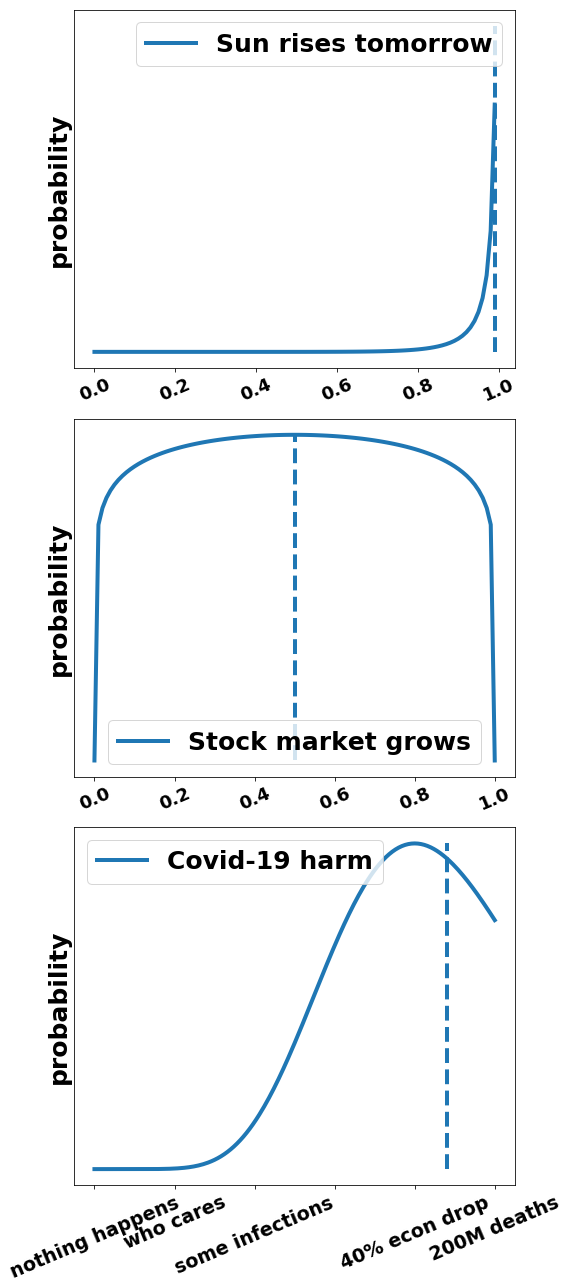

In [41]:
#priors for the overview

fig, axs = plt.subplots(nrows=3, ncols=1, sharex=False, figsize=(8, 18))

fs_tick_labels = 19

axs[0].plot(x, beta_p0, label='Sun rises tomorrow', linewidth=4)
axs[0].vlines(beta_m0, ymin=0, ymax=1*10, linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_ylabel('probability', fontdict={'fontsize':25})
axs[0].legend(prop={'size': 25})

axs[1].plot(x, beta_p2, label='Stock market grows', linewidth=4)
axs[1].vlines(beta_m2, ymin=0, ymax=beta_p2.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_ylabel('probability', fontdict={'fontsize':25})
axs[1].legend(prop={'size': 25})

axs[2].plot(x_gamma, gamma_p0, label='Covid-19 harm', linewidth=4)
axs[2].vlines(g_m0*s, ymin=0, ymax=1*gamma_p0.max(), linestyle='dashed', alpha=1, color="#1f77b4", linewidth=4)
axs[2].set_yticklabels([])
axs[2].set_yticks([])
axs[2].set_xticklabels(['', 'nothing happens', 'who cares', 'some infections', '', '40% econ drop', '200M deaths' ], fontdict={'fontsize':fs_tick_labels})
axs[2].legend(prop={'size': 25})
axs[2].set_ylabel('probability', fontdict={'fontsize':25})

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=23)

plt.tight_layout()
plt.savefig('priors_overview_vert.jpeg', dpi=300)

plt.show();

# Math

$$\underbrace{p(X\vert Y)}_{\text{posterior}} \propto \underbrace{p(Y\vert X)}_{\text{likelihood}} \underbrace{p(X)}_{\text{prior}}$$

$$\underbrace{p(X|Y)}_{\text{posterior}} = \frac{\overbrace{p(Y|X)}^{\text{likelihood}} \overbrace{p(X)}^{\text{prior}}}{\underbrace{\int p(y|x)p(x) dx}_{\text{evidence}}}
\propto \underbrace{p(Y|X)}_{\text{likelihood}} \underbrace{p(X)}_{\text{prior}}$$

# prior shift vs. absolute value

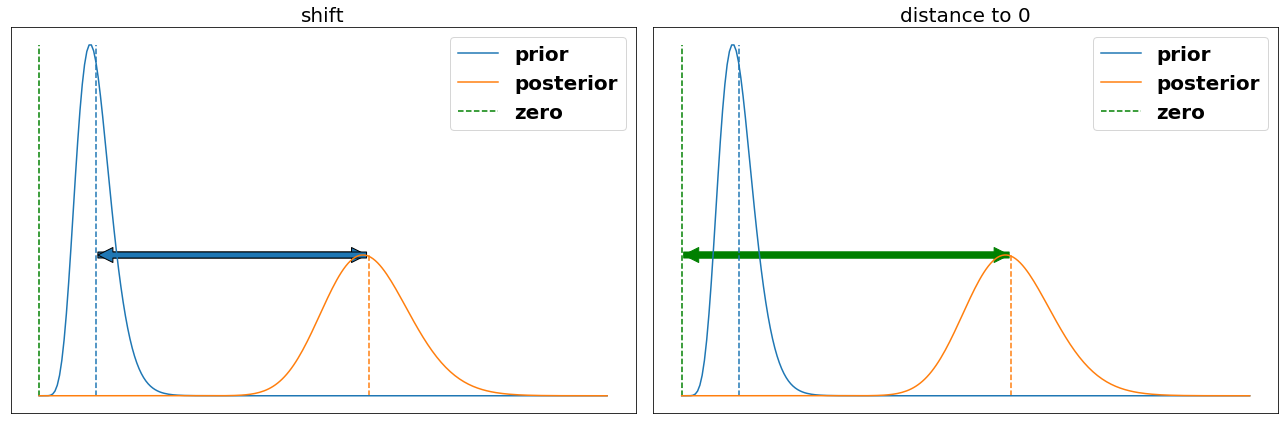

In [18]:
#plot it
import matplotlib.patches as mpatches
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(18,6))
#x_labels = ['', 'nothing happens', 'slight improvement', 'meaningful improvement', '', 'solves poverty']

fs_tick_labels = 15
x_gamma = np.linspace(0, 100, 250+1)

arrow_shift_right = mpatches.FancyArrowPatch((g_p*s,gamma_5.max()), (g_5*s,gamma_5.max()),
                                 mutation_scale=30)
arrow_shift_left = mpatches.FancyArrowPatch((g_5*s,gamma_5.max()), (g_p*s,gamma_5.max()),
                                 mutation_scale=30)

axs[0].add_patch(arrow_shift_right)
axs[0].add_patch(arrow_shift_left)
axs[0].plot(x_gamma, gamma_p, label='prior')
axs[0].plot(x_gamma, gamma_5, label='posterior')
axs[0].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4")
axs[0].vlines(g_5*s, ymin=0, ymax=1*gamma_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e")
axs[0].vlines(0, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="green", label='zero')
axs[0].set_yticklabels([])
axs[0].set_yticks([])
axs[0].set_xticklabels([])
axs[0].set_xticks([])
axs[0].legend(prop={'size': 20})
axs[0].set_title('shift', fontsize=20)

arrow_abs_right = mpatches.FancyArrowPatch((0,gamma_5.max()), (g_5*s,gamma_5.max()),
                                 mutation_scale=30, color='green')
arrow_abs_left = mpatches.FancyArrowPatch((g_5*s,gamma_5.max()), (0,gamma_5.max()),
                                 mutation_scale=30, color='green')

axs[1].add_patch(arrow_abs_right)
axs[1].add_patch(arrow_abs_left)
axs[1].plot(x_gamma, gamma_p, label='prior')
axs[1].plot(x_gamma, gamma_5, label='posterior')
axs[1].vlines(g_p*s, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="#1f77b4")
axs[1].vlines(g_5*s, ymin=0, ymax=1*gamma_5.max(), linestyle='dashed', alpha=1, color="#ff7f0e")
axs[1].vlines(0, ymin=0, ymax=1*gamma_p.max(), linestyle='dashed', alpha=1, color="green", label='zero')
axs[1].set_yticklabels([])
axs[1].set_yticks([])
axs[1].set_xticklabels([])
axs[1].set_xticks([])
axs[1].legend(prop={'size': 20})
axs[1].set_title('distance to 0', fontsize=20)


plt.tight_layout()
plt.savefig('shift_vs_distance0.png', dpi=300)

plt.show();